<a href="https://colab.research.google.com/github/Haoyanz/Project-in-AI/blob/master/AlexNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip '/content/drive/My Drive/state-farm-distracted-driver-detection.zip'

In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from glob import glob
import cv2

%matplotlib inline

In [0]:
# set path to train & test directory
train_path = '/content/imgs/train'
test_path = '/content/imgs/test'

In [19]:
# image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical', subset="training", color_mode='rgb')

val_generator = val_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical', subset="validation",  color_mode='rgb')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [0]:
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

col = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

c0 : safe driving


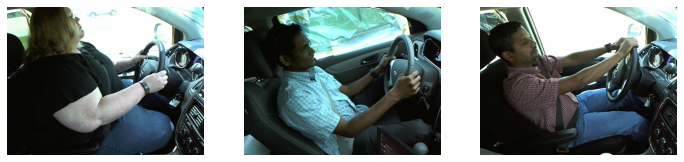

c1 : texting - right


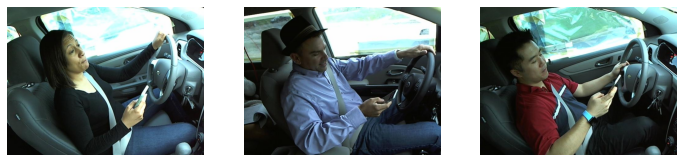

c2 : talking on the phone - right


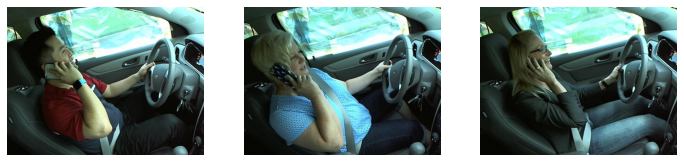

c3 : texting - left


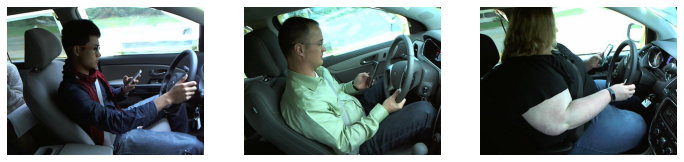

c4 : talking on the phone - left


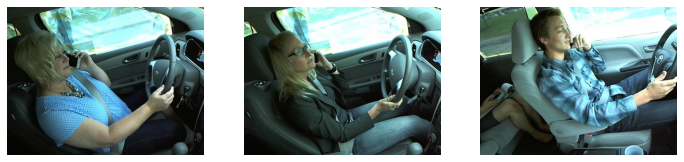

c5 : operating the radio


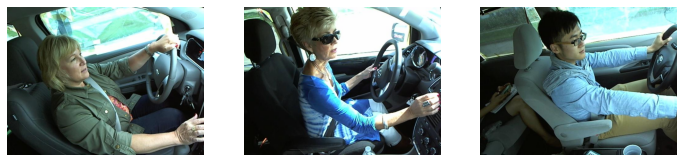

c6 : drinking


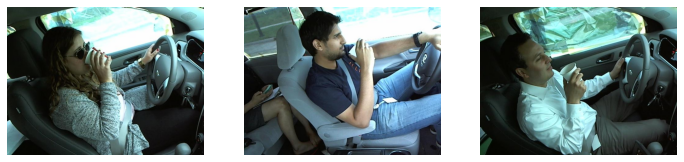

c7 : reaching behind


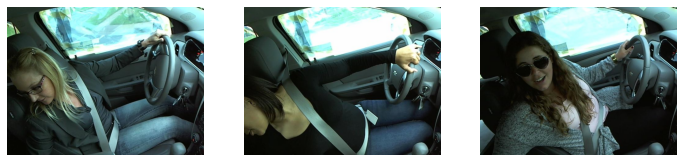

c8 : hair and makeup


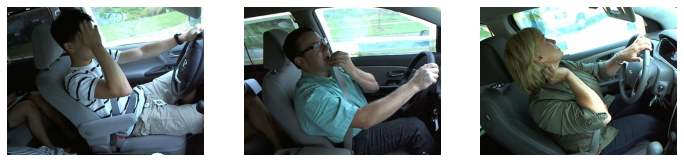

c9 : talking to passenger


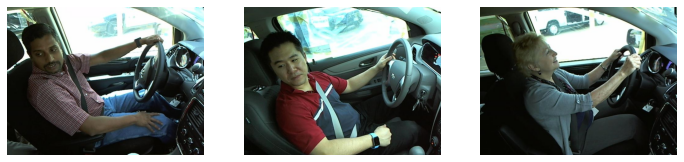

In [21]:
# plot sample images for each category
for label in labels:
    f, ax = plt.subplots(figsize=(12, 10))
    files = glob('/content/imgs/train/{}/*.jpg'.format(label))
    
    print('{} : {}'.format(label, col[label]))
    for x in range(3):
        plt.subplot(3, 3, x+1)
        image = read_image(files[x])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

Build CNN Model (AlexNet Architecture)

In [30]:
# Initialize Sequential Model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_25 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_26 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 256)        

In [0]:
# compile model
# Adam lr = .001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# train model

# validation_split = 0.2
# n_train = 17943
# n_val = 4481
# batch_size = 64

history = model.fit_generator(train_generator,
                              steps_per_epoch = 17943//64,
                              validation_data = val_generator,
                              validation_steps = 4481//64,
                              epochs = 10,
                              verbose = 1)


Epoch 1/10
280/280 [==============================] - 113s 403ms/step - loss: 0.2493 - accuracy: 0.9249 - val_loss: 0.2268 - val_accuracy: 0.9455
Epoch 2/10
280/280 [==============================] - 112s 398ms/step - loss: 0.1469 - accuracy: 0.9565 - val_loss: 1.7208 - val_accuracy: 0.6898
Epoch 3/10
280/280 [==============================] - 111s 397ms/step - loss: 0.1096 - accuracy: 0.9662 - val_loss: 0.1217 - val_accuracy: 0.9735
Epoch 4/10
280/280 [==============================] - 110s 394ms/step - loss: 0.0622 - accuracy: 0.9826 - val_loss: 0.5003 - val_accuracy: 0.8515
Epoch 5/10
280/280 [==============================] - 110s 394ms/step - loss: 0.0599 - accuracy: 0.9834 - val_loss: 1.4403 - val_accuracy: 0.6504
Epoch 6/10
280/280 [==============================] - 110s 394ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.4078 - val_accuracy: 0.9303
Epoch 7/10
280/280 [==============================] - 110s 393ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.5255 -

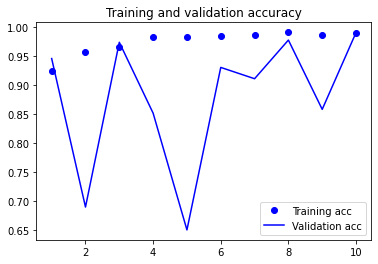

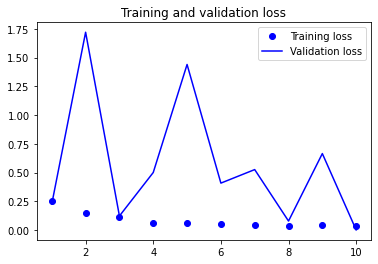

In [27]:
# Plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Adam lr = .0001
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 17943//64,
                              validation_data = val_generator,
                              validation_steps = 4481//64,
                              epochs = 20,
                              verbose = 1)

Epoch 1/20
280/280 [==============================] - 113s 405ms/step - loss: 1.1159 - accuracy: 0.6493 - val_loss: 4.1597 - val_accuracy: 0.2069
Epoch 2/20
280/280 [==============================] - 113s 405ms/step - loss: 0.2003 - accuracy: 0.9383 - val_loss: 0.3504 - val_accuracy: 0.8275
Epoch 3/20
280/280 [==============================] - 113s 404ms/step - loss: 0.1044 - accuracy: 0.9674 - val_loss: 0.0713 - val_accuracy: 0.9681
Epoch 4/20
280/280 [==============================] - 113s 403ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.1550 - val_accuracy: 0.9660
Epoch 5/20
280/280 [==============================] - 113s 403ms/step - loss: 0.0404 - accuracy: 0.9885 - val_loss: 0.0180 - val_accuracy: 0.9787
Epoch 6/20
280/280 [==============================] - 112s 401ms/step - loss: 0.0466 - accuracy: 0.9860 - val_loss: 0.0437 - val_accuracy: 0.9778
Epoch 7/20
280/280 [==============================] - 112s 401ms/step - loss: 0.0247 - accuracy: 0.9916 - val_loss: 0.1328 -

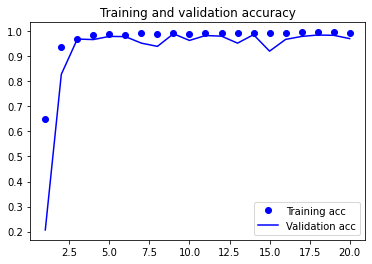

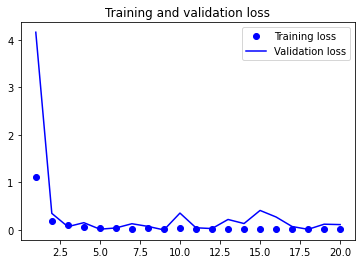

In [33]:
# Plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()